In [70]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [71]:
train = pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [72]:
test = pd.read_csv('test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [73]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [75]:
# 날짜(datetime)을 연,월,일,시간으로 분리
train['dt_year'] = pd.to_datetime(train['datetime']).dt.year
train['dt_month'] = pd.to_datetime(train['datetime']).dt.month
train['dt_day'] = pd.to_datetime(train['datetime']).dt.day
train['dt_hour'] = pd.to_datetime(train['datetime']).dt.hour

In [76]:
# 요일
train['dt_yoil'] = pd.to_datetime(train['datetime']).dt.dayofweek

In [77]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dt_year,dt_month,dt_day,dt_hour,dt_yoil
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [78]:
# 연도별 대여량
train.groupby('dt_year')['count'].sum()

dt_year
2011     781979
2012    1303497
Name: count, dtype: int64

<AxesSubplot:xlabel='dt_year'>

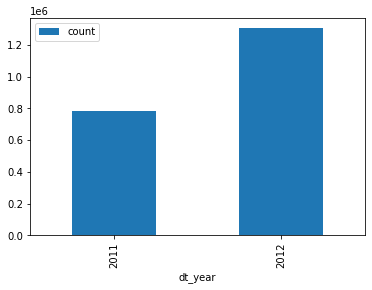

In [79]:
import matplotlib.pyplot as plt
group_df = pd.DataFrame(train.groupby('dt_year')['count'].sum())
group_df.plot(kind='bar')

<AxesSubplot:xlabel='dt_month'>

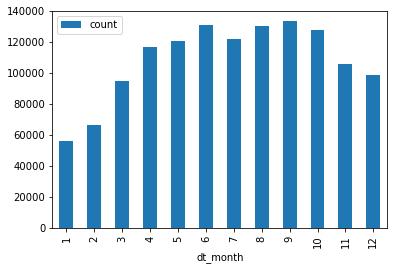

In [80]:
# 2012년 월별 대여량
group_df = pd.DataFrame(train[train['dt_year']==2012].groupby('dt_month')['count'].sum())
group_df.plot(kind='bar')

<AxesSubplot:xlabel='dt_hour'>

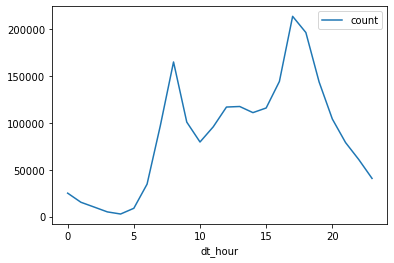

In [81]:
group_df = pd.DataFrame(train.groupby('dt_hour')['count'].sum())
group_df.plot(kind='line')

In [82]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dt_year,dt_month,dt_day,dt_hour,dt_yoil
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546,-0.010553
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354,-0.191832
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780,-0.704267
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740,-0.047692
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430,-0.038466
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343,-0.040235
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011,-0.026507
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631,-0.024804
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045,0.246959
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540,-0.084427


<AxesSubplot:>

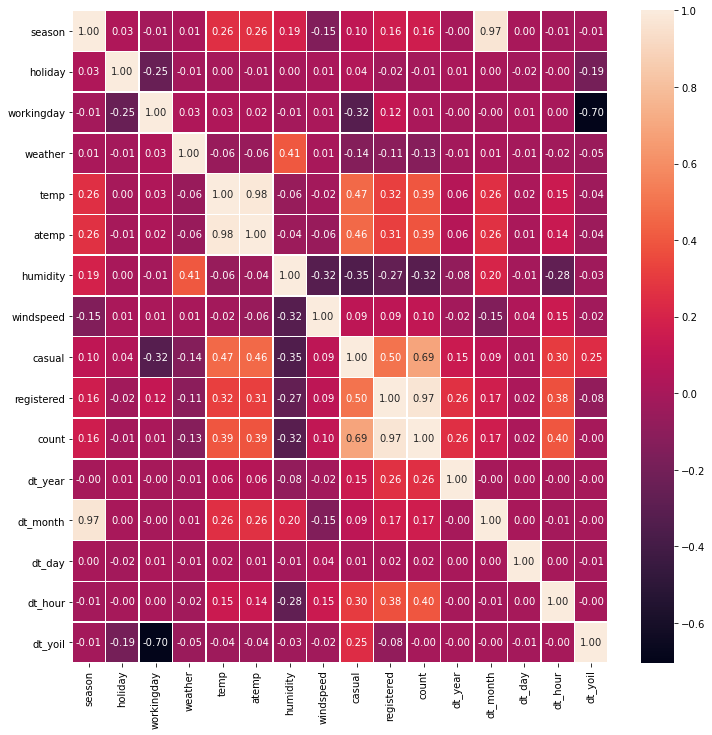

In [83]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(data=train.corr(), annot=True, linewidths=0.5, fmt='.2f')

In [84]:
# 컬럼 삭제
# datetime
# casual, registered 제거(count와 비독립)
train.drop(['datetime','casual','registered'], axis=1, inplace=True)

In [85]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,dt_year,dt_month,dt_day,dt_hour,dt_yoil
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,5


### 모델 평가

In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [87]:
model = GradientBoostingRegressor()
scores = cross_val_score(model, train.drop('count',1), train['count'], cv=5)
scores.mean()

0.6631979274371909

In [88]:
# RMSLE 함수
def rmsle(a, p):
    import numpy as np
    l1 = np.nan_to_num(np.array([np.log(v+1) for v in a]))
    l2 = np.nan_to_num(np.array([np.log(v+1) for v in p]))
    calc = np.sqrt(np.mean((l1-l2)**2))
    return calc

In [89]:
import numpy as np
rmsle(np.array([1,2,3]), np.array([1,2,3]))

0.0

In [90]:
# 데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
                                    train.drop('count',1),
                                    train['count'],
                                    random_state=42
)

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   dt_year     10886 non-null  int64  
 10  dt_month    10886 non-null  int64  
 11  dt_day      10886 non-null  int64  
 12  dt_hour     10886 non-null  int64  
 13  dt_yoil     10886 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 1.2 MB


In [92]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)
rmsle(y_test, pred)

0.4360897325987303

In [93]:
model = DecisionTreeRegressor()
# 로그
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
model.fit(x_train, y_train_log)
pred = model.predict(x_test)
rmsle(np.exp(y_test_log), np.exp(pred))

0.4359476246730556

In [94]:
model = RandomForestRegressor()
# 로그
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
model.fit(x_train, y_train_log)
pred = model.predict(x_test)
rmsle(np.exp(y_test_log), np.exp(pred))

0.29134039669984346

In [95]:
model = GradientBoostingRegressor()
# 로그
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
model.fit(x_train, y_train_log)
pred = model.predict(x_test)
rmsle(np.exp(y_test_log), np.exp(pred))

0.37284741611454536

In [96]:
model = xgb.XGBRegressor()
# 로그
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
model.fit(x_train, y_train_log)
pred = model.predict(x_test)
rmsle(np.exp(y_test_log), np.exp(pred))

0.2900146638537431

In [97]:
# GridSearch
from sklearn.model_selection import GridSearchCV

# n_estimators, max_depth, learning_rate
params = {
    'n_estimators':[200,400,600,800,1000],
    'max_depth':[4,5,6,7,8],
    'learning_rate':[0.001,0.01,0.03,0.05,0.07]
}
gs = GridSearchCV(xgb.XGBRegressor(), params, cv=5)
gs.fit(x_train, y_train)
gs.best_params_

{'learning_rate': 0.03, 'max_depth': 8, 'n_estimators': 1000}

In [98]:
model = xgb.XGBRegressor(n_estimators=1000, max_depth=8, learning_rate=0.03)
# 로그
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
model.fit(x_train, y_train_log)
pred = model.predict(x_test)
rmsle(np.exp(y_test_log), np.exp(pred))

0.27791841291919805

### 테스트셋 전처리

In [99]:
# 날짜(datetime)을 연,월,일,시간으로 분리
test['dt_year'] = pd.to_datetime(test['datetime']).dt.year
test['dt_month'] = pd.to_datetime(test['datetime']).dt.month
test['dt_day'] = pd.to_datetime(test['datetime']).dt.day
test['dt_hour'] = pd.to_datetime(test['datetime']).dt.hour
test['dt_yoil'] = pd.to_datetime(test['datetime']).dt.dayofweek
test.drop(['datetime'], axis=1, inplace=True)

In [100]:
model = xgb.XGBRegressor(n_estimators=1000, max_depth=8, learning_rate=0.03)
# 로그
model.fit(x_train, y_train_log)
pred = model.predict(test)

In [101]:
# 학습할때 로그처리한 값으로 학습했기 때문에
# 예측값 exp()
pred = np.exp(pred)

In [102]:
pred[:10]

array([ 14.643624 ,   4.3278823,   3.367181 ,   2.2378287,   1.5338662,
         4.213371 ,  33.578068 ,  78.08791  , 183.21913  ,  95.0633   ],
      dtype=float32)

In [103]:
test2 = pd.read_csv('test.csv')
pd.DataFrame({
    'datetime':test2['datetime'],
    'count':pred
}).to_csv('pred.csv',index=False)